<a href="https://colab.research.google.com/github/FridaTrepca/datavis-technologies-handson/blob/main/DS4B_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
# Load data
df = pd.read_csv("/content/Data_Churn.csv")
df.info()
# # Convert Area Code to a categorical variable
# df['Area_Code2'] = pd.Categorical(df['Area_Code2'])

# # Perform dummy encoding
# df_encoded = pd.get_dummies(df, columns=['Area_Code2'], prefix='category')

# # Display the updated DataFrame
# print(df_encoded)
#  # Dummy encoding for Area code
# df_encoded = pd.get_dummies(df, columns=['Area_Code2'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area_Code2      4000 non-null   int64  
 1   Vmail_Message   4000 non-null   int64  
 2   Day_Mins        4000 non-null   float64
 3   Day_Calls       4000 non-null   int64  
 4   Day_Charge      4000 non-null   float64
 5   Eve_Mins        4000 non-null   float64
 6   Eve_Calls       4000 non-null   int64  
 7   Eve_Charge      4000 non-null   float64
 8   Night_Mins      4000 non-null   float64
 9   Night_Calls     4000 non-null   int64  
 10  Night_Charge    4000 non-null   float64
 11  Intl_Mins       4000 non-null   float64
 12  Intl_Calls      4000 non-null   int64  
 13  Intl_Charge     4000 non-null   float64
 14  CustServ_Calls  4000 non-null   int64  
 15  Churn           4000 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 500.1 KB


In [34]:
# # Convert numerical_column to a categorical variable
# df['C'] = 'area' + df['Area_Code2'].astype(str)


# # Perform dummy encoding
# df_encoded = pd.get_dummies(df, columns=['C'])
# # Display the updated DataFrame
# print(df_encoded)

In [35]:
# Display the first few rows of the dataset
print("Head of the DataFrame:")
print(df.head())

# Get summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# # Display unique values in a specific column
# column_to_explore = 'your_column_name'
# print(f"\nUnique Values in {column_to_explore}:")
# print(df[column_to_explore].unique())

# # Count the occurrences of each value in a specific column
# print(f"\nValue Counts in {column_to_explore}:")
# print(df[column_to_explore].value_counts())

# # Plot a histogram for a numerical column
# numerical_column = 'numerical_column_name'
# df[numerical_column].plot(kind='hist', title=f'Histogram of {numerical_column}')
# plt.show()

Head of the DataFrame:
   Area_Code2  Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  \
0           0              0     206.6        105       35.12     67.47   
1           2              0     225.0        110       38.25     73.26   
2           0             32     194.0         83       32.98     45.51   
3           2             27     196.6         89       33.42     54.18   
4           0              0     223.0        109       37.91     65.61   

   Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  Intl_Mins  \
0         12       19.12       24.99           10         11.25       14.6   
1         11       20.76       22.12            9          9.95       10.7   
2         11       12.89       20.58           11          9.26        9.3   
3         10       15.35       24.50            8         11.03        6.6   
4         10       18.59       13.86           13          6.24       11.6   

   Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
0    

In [62]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Area_Code2  Vmail_Message  Day_Mins  Day_Calls  Day_Charge  \
Area_Code2        1.000000      -0.020056 -0.031548  -0.026627   -0.031546   
Vmail_Message    -0.020056       1.000000  0.001933   0.000162    0.001925   
Day_Mins         -0.031548       0.001933  1.000000   0.002013    1.000000   
Day_Calls        -0.026627       0.000162  0.002013   1.000000    0.002015   
Day_Charge       -0.031546       0.001925  1.000000   0.002015    1.000000   
Eve_Mins          0.014478       0.012903 -0.018440   0.007760   -0.018434   
Eve_Calls        -0.003634       0.007040  0.009159  -0.002378    0.009161   
Eve_Charge        0.014485       0.012911 -0.018449   0.007767   -0.018444   
Night_Mins       -0.010341       0.011158  0.013037   0.016008    0.013041   
Night_Calls       0.014948       0.012339  0.006330  -0.008040    0.006332   
Night_Charge     -0.010369       0.011169  0.013026   0.016005    0.013030   
Intl_Mins        -0.022433      -0.001146 -0

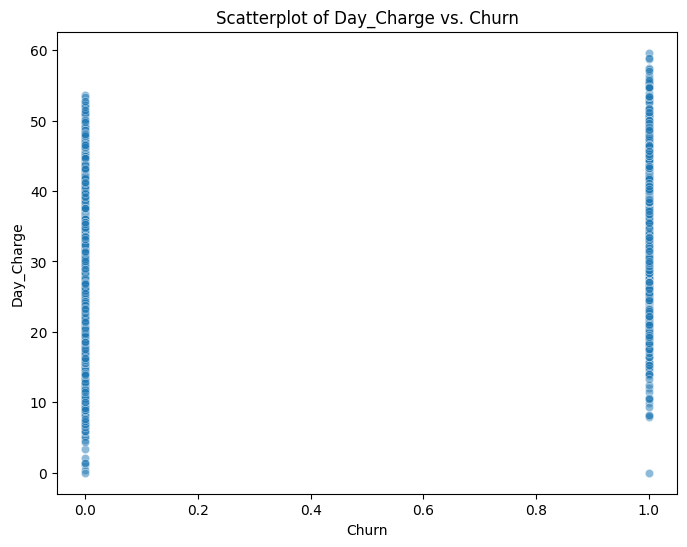

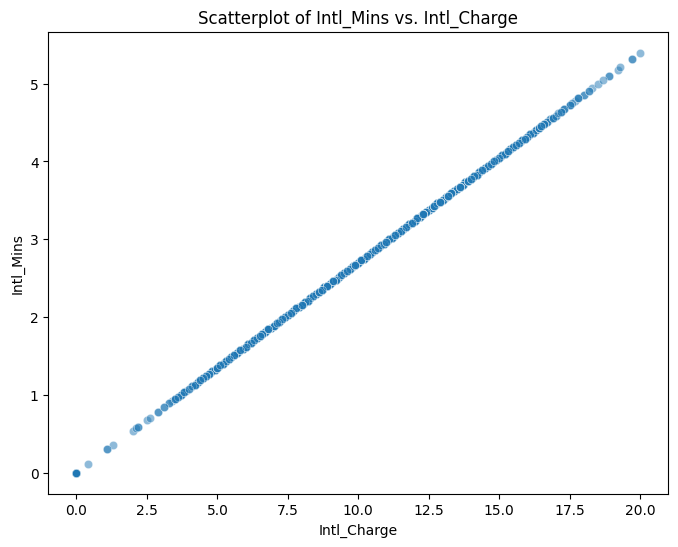

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y='Day_Charge', x='Churn', data=df, alpha=0.5)
plt.title('Scatterplot of Day_Charge vs. Churn')
plt.ylabel('Day_Charge')
plt.xlabel('Churn')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(y='Intl_Charge', x='Intl_Mins', data=df, alpha=0.5)
plt.title('Scatterplot of Intl_Mins vs. Intl_Charge')
plt.ylabel('Intl_Mins')
plt.xlabel('Intl_Charge')
plt.show()

In [38]:
#Creating new variables for feature engineering
# Create a new variable by adding two existing variables
df['Daily Minutes'] = df['Day_Mins'] + df['Eve_Mins']+ df['Night_Mins']
df['Daily Calls'] = df['Day_Calls'] + df['Eve_Calls']+ df['Night_Calls']
df['Daily Charge'] = df['Day_Charge'] + df['Eve_Charge']+ df['Night_Charge']



In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  # Add this import

# Assuming 'Churn' is your target variable
variables_to_exclude = ['Day_Mins', 'Eve_Mins', 'Day_Mins', 'Night_Mins', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Day_Charge', 'Eve_Charge', 'Night_Charge']
df1 = df.drop(variables_to_exclude, axis=1)
X = df1.drop('Churn', axis=1)  # Features
y = df1['Churn']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Initialize a decision tree model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances (information gain)
feature_importances = model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')

Area_Code2: 0.0141
Vmail_Message: 0.1300
Intl_Mins: 0.0332
Intl_Calls: 0.0403
Intl_Charge: 0.0489
CustServ_Calls: 0.0929
Daily Minutes: 0.0553
Daily Calls: 0.0865
Daily Charge: 0.4988


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.90
Confusion Matrix:
[[2258  146]
 [ 127  269]]


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.65
Recall: 0.68
F1-Score: 0.66


XG Boost

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read in the data
df2 = df1
# # Select target variable
target_name = 'Churn'

# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=[target_name]), df2[target_name], test_size=0.2, random_state=43)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)
y_mean = np.array([y_train.mean()] * len(y_test))

# Calculate rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_mean = np.sqrt(mean_squared_error(y_test, y_mean))

print("RMSE:", rmse)
print("Mean pred RMSE:", rmse_mean)

RMSE: 0.2597445803727776
Mean pred RMSE: 0.36979776990268615


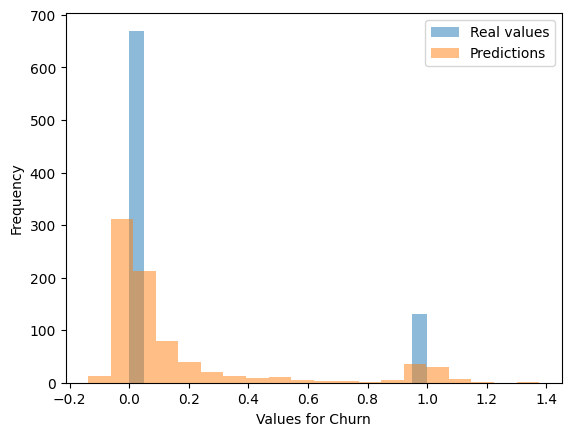

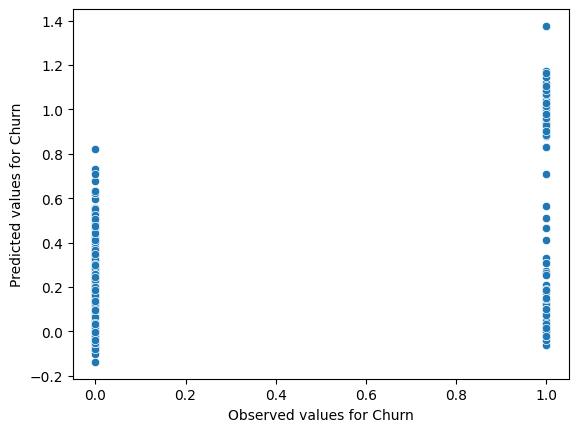

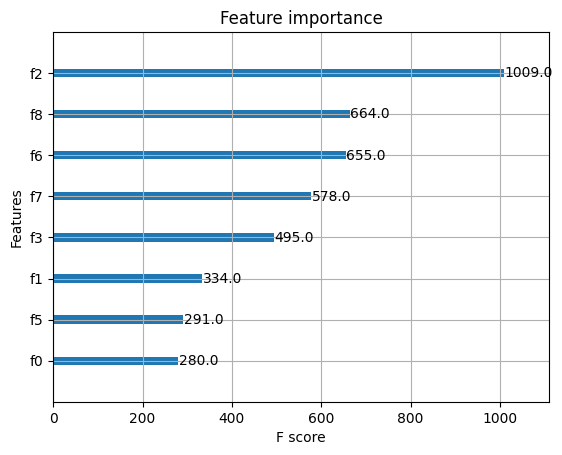

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of predictions and real values using matplotlib with same x-axis
fig, ax = plt.subplots()
ax.hist(y_test, bins=20, alpha=0.5, label="Real values")
ax.hist(y_pred, bins=20, alpha=0.5, label="Predictions")
ax.set_xlabel("Values for " + target_name)
ax.set_ylabel("Frequency")
ax.legend()
plt.show()


# Scatterplot of predictions and real values
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.set_xlabel("Observed values for " + target_name)
ax.set_ylabel("Predicted values for " + target_name)
plt.show()


# Feature importance
xgb.plot_importance(xgb_model)
plt.show()

# Logistic Regression


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       694
           1       0.43      0.08      0.14       106

    accuracy                           0.86       800
   macro avg       0.65      0.53      0.53       800
weighted avg       0.82      0.86      0.82       800


Confusion Matrix:
[[682  12]
 [ 97   9]]


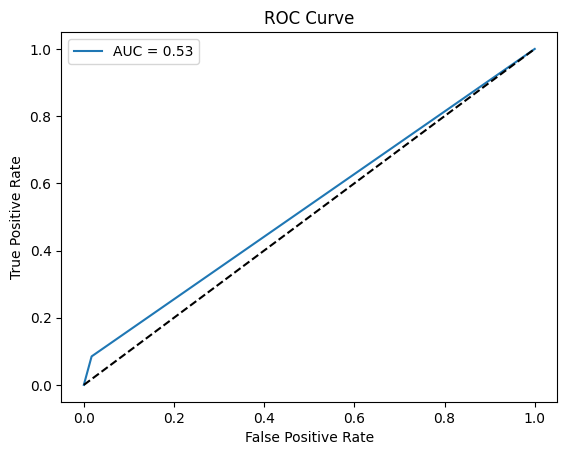

In [72]:
 # Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


 # Step 4: Define features (X) and target variable (y)
X = df1.drop('Churn', axis=1)  # Features
y = df1['Churn']  # Target variable


 # 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features (optional but can be beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Step 8: Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Step 9: Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       694
           1       0.97      0.62      0.76       106

    accuracy                           0.95       800
   macro avg       0.96      0.81      0.86       800
weighted avg       0.95      0.95      0.94       800


Confusion Matrix:
[[692   2]
 [ 40  66]]


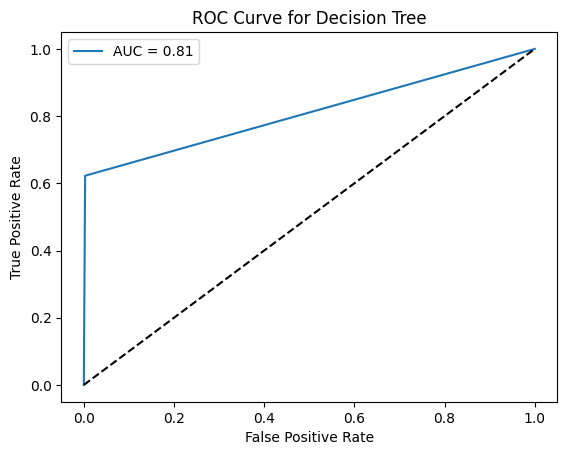

In [73]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 2: Load your dataset
df3 = df

# Step 3: Explore your data (optional)
# You might want to inspect the data using df.head() or df.info() to understand its structure.

# Step 4: Define features (X) and target variable (y)
X = df3.drop('Churn', axis=1)  # Features
y = df3['Churn']  # Target variable

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Step 8: Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Step 9: Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       694
           1       0.83      0.66      0.74       106

    accuracy                           0.94       800
   macro avg       0.89      0.82      0.85       800
weighted avg       0.93      0.94      0.93       800


Confusion Matrix:
[[680  14]
 [ 36  70]]


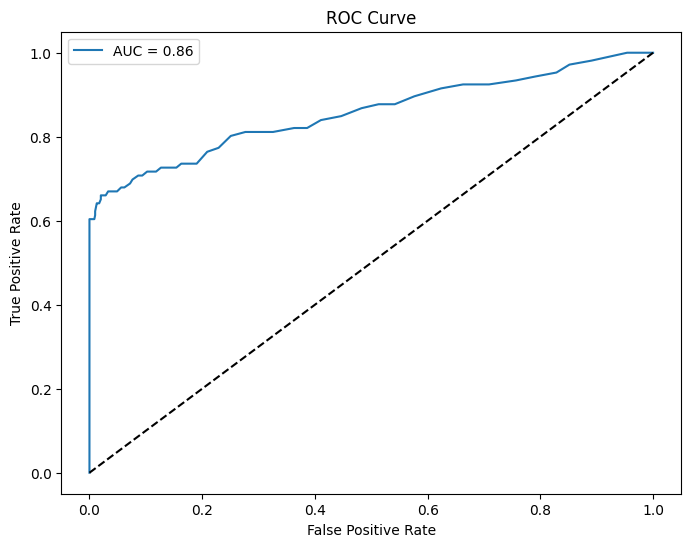

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()